# *Handwritten Text Recognition*

In [1]:
#Install imutils
!pip install imutils

In [7]:
#import all the required packages
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

2022-11-13 16:23:03.450827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
#Load the data
dir = "/Users/nidhimasur/Desktop/Train/"
train_data = []
img_size = 32
non_chars = ["#","$","&","@",".DS_Store"]
for i in os.listdir(dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        train_data.append([img,i])

In [10]:
#Check the length of the training data
len(train_data)

140000

In [52]:
#display the training data
train_data

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'F'],
 [array([[0, 2, 0, ..., 0, 0, 0],
         [2, 1, 0, ..., 0, 0, 0],
         [1, 0, 2, ..., 0, 0, 0],
         ...,
         [0, 0, 2, ..., 0, 3, 0],
         [0, 4, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 2, 0, 0]], dtype=uint8),
  '2'],
 [array([[3, 0, 1, ..., 0, 0, 0],
         [0, 2, 0, ..., 0, 0, 0],
         [3, 0, 2, ..., 0, 0, 0],
         ...,
         [3, 0, 2, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'S'],
 [array([[0, 0, 0, ..., 0, 5, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 1, 0, 3],
         ...,
         [0, 2, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [1, 0, 1, ..., 0, 0, 0]], dtype=uint8),
  'S'],
 [array([[0, 0, 0, ..., 5, 0, 0],
  

In [11]:
#Load the validation data
val_dir = "/Users/nidhimasur/Desktop/Validation/"
val_data = []
img_size = 32
for i in os.listdir(val_dir):
    if i in non_chars:
        continue
    count = 0
    sub_directory = os.path.join(val_dir,i)
    for j in os.listdir(sub_directory):
        count+=1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory,j),0)
        img = cv2.resize(img,(img_size,img_size))
        val_data.append([img,i])

In [12]:
#Display the length of the 
len(val_data)

15209

In [53]:
#Display the validation data
val_data

[[array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 1, ..., 0, 0, 0],
         [1, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  'I'],
 [array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 0, 1],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  '4'],
 [array([[0, 0, 0, ..., 1, 2, 0],
         [0, 0, 0, ..., 2, 0, 3],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [4, 0, 0, ..., 0, 0, 0],
         [0, 3, 1, ..., 0, 0, 0],
         [2, 0, 2, ..., 0, 0, 0]], dtype=uint8),
  '6'],
 [array([[1, 0, 2, ..., 0, 3, 0],
         [0, 0, 0, ..., 4, 0, 0],
         [2, 1, 0, ..., 0, 1, 3],
         ...,
         [0, 2, 1, ..., 0, 0, 1],
         [0, 0, 0, ..., 0, 4, 0],
         [1, 1, 0, ..., 0, 0, 1]], dtype=uint8),
  '3'],
 [array([[2, 0, 0, ..., 0, 0, 0],
  

In [13]:
#shuffle the training data and validation data 
random.shuffle(train_data)
random.shuffle(val_data)

In [14]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [15]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [16]:
#using Label Binarizer transform and firt the training and validation data
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [17]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [18]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [19]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [20]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [21]:
#CNN Layers
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

2022-11-13 16:26:28.573691: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [23]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [24]:
#run the model for 50 epochs
history = model.fit(train_X,train_Y, epochs=50, batch_size=32, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/50
4375/4375 [==============================] - 92s 21ms/step - loss: 0.6173 - accuracy: 0.8023 - val_loss: 0.3685 - val_accuracy: 0.8782
Epoch 2/50
4375/4375 [==============================] - 94s 21ms/step - loss: 0.3472 - accuracy: 0.8830 - val_loss: 0.2649 - val_accuracy: 0.9158
Epoch 3/50
4375/4375 [==============================] - 89s 20ms/step - loss: 0.3044 - accuracy: 0.8963 - val_loss: 0.2801 - val_accuracy: 0.9075
Epoch 4/50
4375/4375 [==============================] - 94s 21ms/step - loss: 0.2778 - accuracy: 0.9046 - val_loss: 0.2718 - val_accuracy: 0.9030
Epoch 5/50
4375/4375 [==============================] - 93s 21ms/step - loss: 0.2614 - accuracy: 0.9093 - val_loss: 0.2587 - val_accuracy: 0.9057
Epoch 6/50
4375/4375 [==============================] - 93s 21ms/step - loss: 0.2509 - accuracy: 0.9128 - val_loss: 0.2402 - val_accuracy: 0.9205
Epoch 7/50
4375/4375 [==============================] - 87s 20ms/step - loss: 0.2379 - accuracy: 0.9168 - val_loss: 0.2495 -

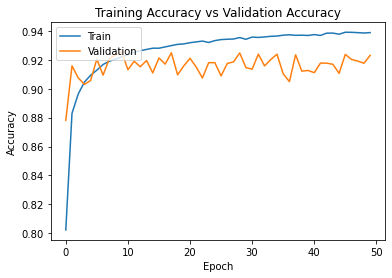

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

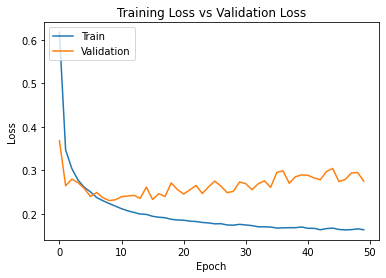

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [27]:
#The sort contours function is used to get the correct order of individual characters for correct output extraction.
#In this case for extracting a single word, a left to right sorting of individual characters is needed.

def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [28]:
#The get letters function fetches the list of letters and get word function gets the individual word.
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [29]:
#Defining get_word function to join letters and find a word
def get_word(letter):
    word = "".join(letter)
    return word

1/1 [==============================] - 0s 18ms/step


BENES


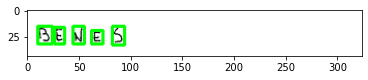

In [30]:
#using the get_letters function try predicting the text from the image
letter,image = get_letters("/Users/nidhimasur/Desktop/train_v2/train/TRAIN_00003.jpg")
word = get_word(letter)

plt.imshow(image)

print("\n")
print(word)

1/1 [==============================] - 0s 28ms/step
LIL01


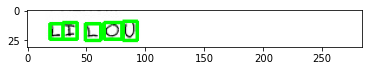

In [31]:
letter,image = get_letters("/Users/nidhimasur/Desktop/train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 17ms/step
7AFFF1X


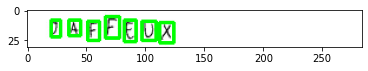

In [32]:
letter,image = get_letters("/Users/nidhimasur/Desktop/train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 16ms/step
RUPP


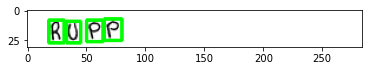

In [33]:
letter,image = get_letters("/Users/nidhimasur/Desktop/validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 19ms/step
VALENTJNE


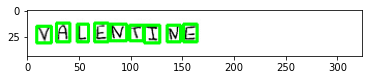

In [34]:
letter,image = get_letters("/Users/nidhimasur/Desktop/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 [==============================] - 0s 19ms/step
TAANK


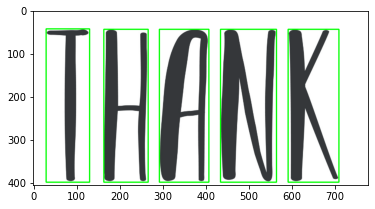

In [61]:
letter,image = get_letters("/Users/nidhimasur/Desktop/test_v2/test/train4.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)